### Scientific Question
 
How does geochemistry and inferred volatile content evolve over the emplacement of the Columbia River Basalt Group?

### Hypothesis

The Columbia River Basalt Group consists of 350 lava flows that are divided into 5 major formations: Steens, Imnaha, Grande Ronde, Wanapum, and Saddle Moutain. The earlier emplaced Steens formation consist of more primitive magmas, therefore I predict the Steens may have a greater volatile content than the later formations.

### Dataset

[Compilation of geochemistry data from the Columbia River Plateau-Blue Mountains Province](https://drive.google.com/file/d/14ayP9bT4SRdWnwocO50IcPw0J963tqWR/view?usp=sharing)

File downloaded from the GEOROC - Geochemical database (http://georoc.mpch-mainz.gwdg.de/georoc/). 
<br/> Date of Query: November 13, 2020
<br/> Query Criteria: Query by Geologic Setting -> Continental Flood Basalts -> Yellowstone-Snake River Plain Volcanic Province -> Columbia Plateau-Blue Mountains Province -> No Further Constraint -> Sample Criteria (combined with OR) -> Type of Material: Volcanic Glass, Inclusion, Mineral, Wholerock 

### Analysis

First, I will load the .csv file of published geochemical data for the Columbia River Basalt Group; I will clean up the data file for any missing values, normalize the data to 100%, and address any inconsistent reporting of data (i.e. reporting FeO vs Fe2O3, all data will be converted to FeO*). 

<b>Step 1:</b> Import pandas, numpy, matplotlib, IPython figure display settings, cartopy. Install Pyrolite.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('retina')
%matplotlib inline
import cartopy
import cartopy.crs as ccrs

In [2]:
pip install pyrolite

Note: you may need to restart the kernel to use updated packages.


<b>Step 2:</b> Load the .csv file of published geochemical data for the Columbia River Basalt Group using pandas. Skip bottom 3 rows containing citation and query information.

In [3]:
df = pd.read_csv('GEOROC_Compilation_ColumbiaRiverPlateau_11_13_20.csv', skipfooter=3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9311 entries, 0 to 9310
Data columns (total 160 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Year                         object 
 1   CITATION                     object 
 2   SAMPLE NAME                  object 
 3   UNIQUE_ID                    object 
 4   LOCATION                     object 
 5   ELEVATION (MIN.)             float64
 6   ELEVATION (MAX.)             float64
 7   SAMPLING TECHNIQUE           object 
 8   DRILLING DEPTH (MIN.)        float64
 9   DRILLING DEPTH (MAX.)        float64
 10  LAND/SEA (SAMPLING)          object 
 11  ROCK TYPE                    object 
 12  ROCK NAME                    object 
 13  ROCK TEXTURE                 object 
 14  SAMPLE COMMENT               object 
 15  AGE (MIN.)                   float64
 16  AGE (MAX.)                   float64
 17  GEOLOGICAL AGE               object 
 18  GEOLOGICAL AGE PREFIX        object 
 19  ERUPT

<b>Step 3:</b> Extract the stratigraphic information from the "LOCATION" column using Pandas text data functions. Add the information as new columns "MEMBER" and "FORMATION"

In [5]:
df['MEMBER'] = df.LOCATION.str.split('/').str[-1]
df['FORMATION'] = df.MEMBER.str.split('-').str[0]

# FORMATION column has two different keys for the same formation, " WANAPUM BASALT FORMATION" and " WANAPUM BASALT". 
# Use df.replace to rename duplicate.

df = df.replace(to_replace=' WANAPUM BASALT FORMATION',value=' WANAPUM BASALT')
list(df.FORMATION.unique())

[' YAKIMA BASALT',
 ' PICTURE GORGE BASALT',
 ' STEENS BASALT',
 ' BEAR CREEK BASALT',
 ' IMNAHA BASALT',
 ' SADDLE MOUNTAINS BASALT',
 ' WANAPUM BASALT',
 ' GRANDE RONDE BASALT',
 ' COLUMBIA PLATEAU',
 ' WEST BUTTE SHIELD COMPLEX',
 ' SLIDE CREEK BASALT',
 ' POWDER RIVER BASALT',
 ' WEISER BASALT',
 ' STRAWBERRY MOUNTAIN FORMATION',
 ' CLARNO FORMATION',
 ' MALHEUR GORGE BASALT ',
 ' HOG CREEK SEQUENCE ',
 ' WILDCAT CREEK ASH',
 ' KEENEY SEQUENCE ',
 ' JORDAN RANCH TYPE SEQUENCE',
 ' DEVINE CANYON ASH',
 ' SOURDOUGH SEQUENCE ',
 ' KIVETT SEQUENCE',
 ' HIGH LAVA PLAINS VOLCANIC FIELD',
 'MALHEUR GORGE BASALT',
 ' VENATOR RANCH BASALT',
 ' HUNTER CREEK BASALT',
 ' VISHER CREEK RHYOLITE',
 ' SWAMP CREEK RHYOLITE',
 ' MCEWEN CREEK VITROPHYRE',
 ' DINNER CREEK TUFF',
 ' KOOL SPRING FORMATION',
 ' CIRCLE BAR RHYOLITE',
 ' SOUTH FORK DACITE',
 ' BLACK BUTTE RHYOLITE',
 ' PUEBLO MOUNTAINS BASALT',
 ' HAWKS VALLEY ',
 ' MONUMENT DIKE SWARM',
 ' CHIEF JOSEPH DIKE SWARM',
 ' JARBIDGE RHYOLITE',


<b>Step 4:</b> Normalize major element raw data to 100%. Add new columns for the normalized data.

In [6]:
# Define Major Elements and create a new Column with the Major Element Total WT% for the Raw Data.
MAJOR_ELEMENTS_RAW = ['SIO2(WT%)','TIO2(WT%)','AL2O3(WT%)','MGO(WT%)','CAO(WT%)','K2O(WT%)',
                      'NA2O(WT%)','P2O5(WT%)','MNO(WT%)','FE2O3T(WT%)','FE2O3(WT%)','FEOT(WT%)',
                      'FEO(WT%)']
df['Total(WT%)RAW'] = df.loc[:,MAJOR_ELEMENTS_RAW].sum(axis=1, min_count=1)

# # Normalize major element data to 100%. Create a new Column for each normalized element.
df['SIO2(WT%)NORM'] = (df['SIO2(WT%)']/df['Total(WT%)RAW'])*100
df['TIO2(WT%)NORM'] = (df['TIO2(WT%)']/df['Total(WT%)RAW'])*100
df['AL2O3(WT%)NORM'] = (df['AL2O3(WT%)']/df['Total(WT%)RAW'])*100
df['MGO(WT%)NORM'] = (df['MGO(WT%)']/df['Total(WT%)RAW'])*100
df['CAO(WT%)NORM'] = (df['CAO(WT%)']/df['Total(WT%)RAW'])*100
df['K2O(WT%)NORM'] = (df['K2O(WT%)']/df['Total(WT%)RAW'])*100
df['NA2O(WT%)NORM'] = (df['NA2O(WT%)']/df['Total(WT%)RAW'])*100
df['P2O5(WT%)NORM'] = (df['P2O5(WT%)']/df['Total(WT%)RAW'])*100
df['MNO(WT%)NORM'] = (df['MNO(WT%)']/df['Total(WT%)RAW'])*100
df['FE2O3T(WT%)NORM'] = (df['FE2O3T(WT%)']/df['Total(WT%)RAW'])*100
df['FE2O3(WT%)NORM'] = (df['FE2O3(WT%)']/df['Total(WT%)RAW'])*100
df['FEOT(WT%)NORM'] = (df['FEOT(WT%)']/df['Total(WT%)RAW'])*100
df['FEO(WT%)NORM'] = (df['FEO(WT%)']/df['Total(WT%)RAW'])*100

# # Create a new Column with the Major Element Total WT% for the Normalized Data.
MAJOR_ELEMENTS_NORM = ['SIO2(WT%)NORM','TIO2(WT%)NORM','AL2O3(WT%)NORM','MGO(WT%)NORM','CAO(WT%)NORM',
                       'K2O(WT%)NORM','NA2O(WT%)NORM','P2O5(WT%)NORM','MNO(WT%)NORM','FE2O3T(WT%)NORM',
                       'FE2O3(WT%)NORM','FEOT(WT%)NORM','FEO(WT%)NORM']
df['Total(WT%)NORM'] = df.loc[:,MAJOR_ELEMENTS_NORM].sum(axis=1, min_count=1)

# # Create a new Column with Total Alkali content (NA2O + K2O).
df["NA2O+K2O(WT%)NORM"] = df['NA2O(WT%)NORM'] + df['K2O(WT%)NORM']

<b>Step 5:</b> Group dataset by type of sample material. Group dataset by formation, as we are interested in only Steens Basalt, Imnaha Basalt, Saddle Mountains Basalt, Wanapum Basalt, Grande Ronde Basalt, and Picture Gorge Basalt.

In [7]:
# Use the where function and groupby function to group data based on sample type and stratigraphic formation.
gb_inclusion = df.where(df['TYPE OF MATERIAL'] == 'INCLUSION').groupby('FORMATION')
gb_mineral = df.where(df['TYPE OF MATERIAL'] == 'MINERAL / COMPONENT (INCL. GROUNDMASS)').groupby('FORMATION')
gb_glass = df.where(df['TYPE OF MATERIAL'] == 'VOLCANIC GLASS').groupby('FORMATION')
gb_wholerock = df.where(df['TYPE OF MATERIAL'] == 'WHOLE ROCK').groupby('FORMATION')

# Set symbol color for different formations


<b>Step 6:</b> Create a map illustrating the geographical location of sampling sites. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

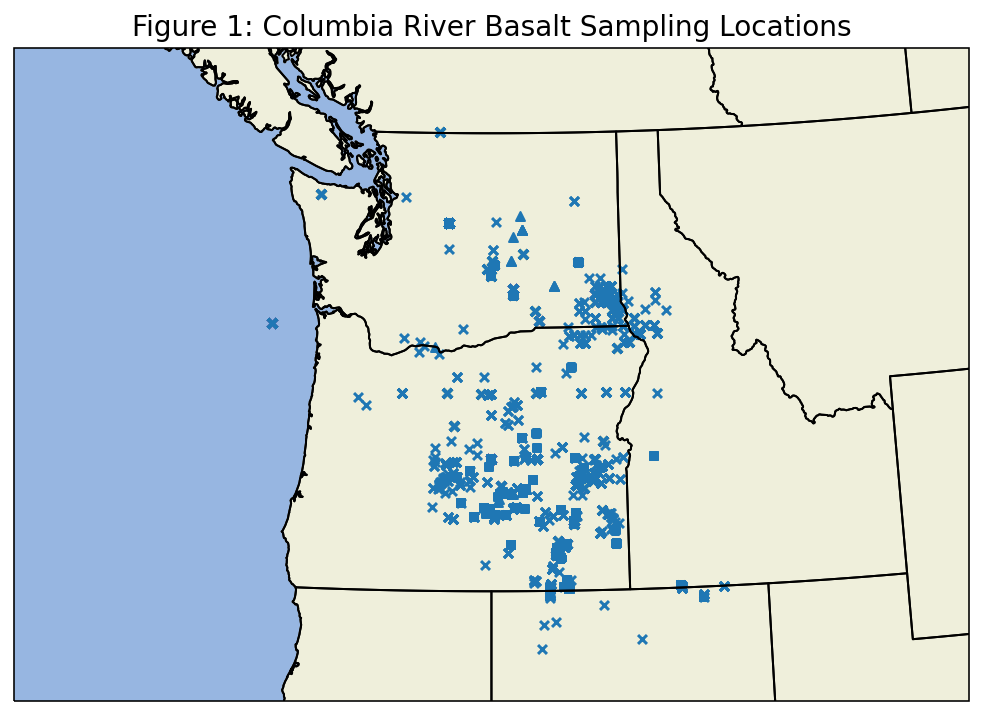

In [8]:
# Define the map extent and figure parameters.
central_lat = 45
central_lon = -120
extent = [-130, -110, 40, 50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize = [12,6])
ax = plt.axes(projection = ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

# Plot sampling locations.
gb_inclusion.plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker='o', transform = ccrs.PlateCarree())
gb_mineral.plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', transform = ccrs.PlateCarree())
gb_glass.plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='^', transform = ccrs.PlateCarree())
gb_wholerock.plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='x', transform = ccrs.PlateCarree())

# Make map look pretty.
ax.set_title('Figure 1: Columbia River Basalt Sampling Locations', fontsize = 14)
ax.set_xlabel('Longitude', fontsize = 12)
ax.set_ylabel('Latitude', fontsize = 12)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
ax.coastlines();

<b>Step 7:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Plot Total Alkali-Silica (TAS) diagram grouped by stratigraphic formation for inclusions, volcanic glass and wholerock data. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

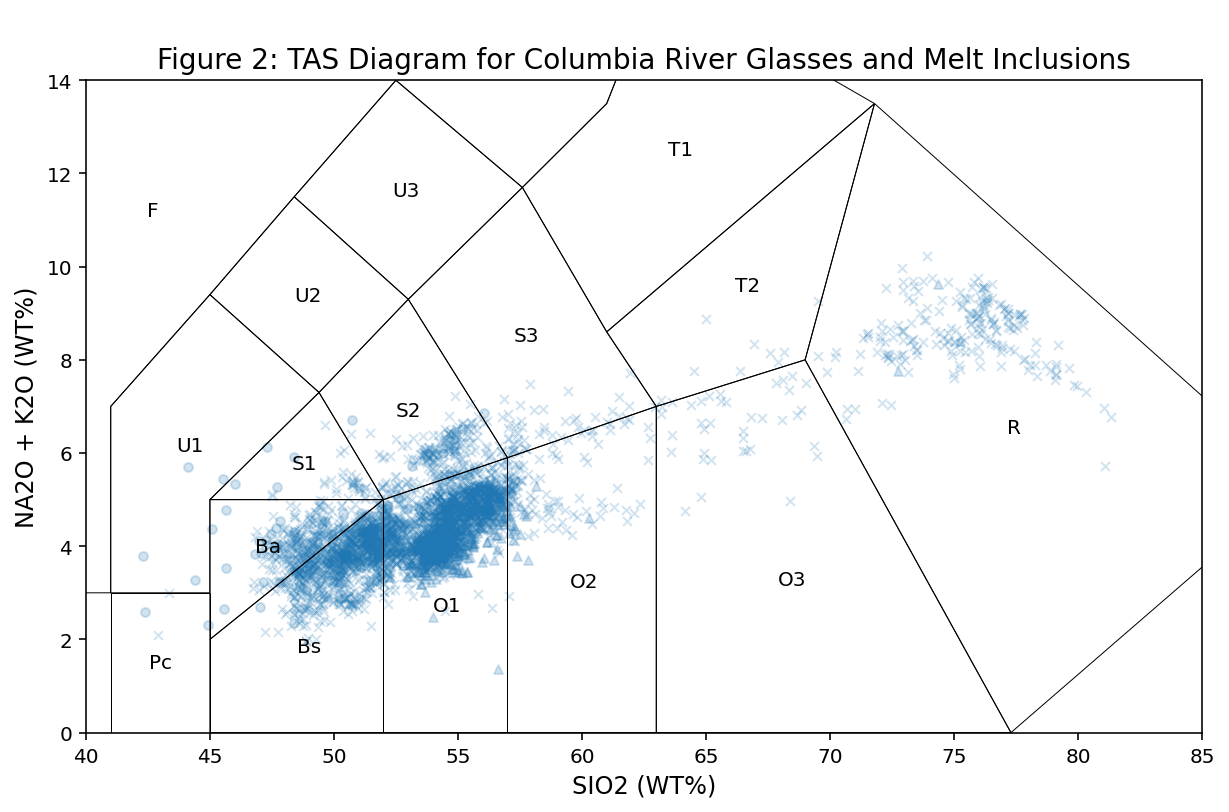

In [9]:
from pyrolite.util.plot.axes import share_axes
from pyrolite.plot.templates import TAS

ax = TAS(linewidth=0.5, labels='ID', figsize=[10,6])
gb_inclusion.plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', marker='o', alpha = 0.2)
gb_glass.plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', marker='^', alpha = 0.2)
gb_wholerock.plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', marker='x', alpha = 0.2)

ax.set_title('Figure 2: TAS Diagram for Columbia River Glasses and Melt Inclusions', fontsize = 14)
ax.set_xlabel('SIO2 (WT%)', fontsize = 12)
ax.set_ylabel('NA2O + K2O (WT%)', fontsize = 12)
ax.set_xlim(40,85)
ax.set_ylim(0,14)
# ax.legend(fontsize = 10)

# plt.legend(loc='lower right')
plt.show();

Create a boxplot of Mg# for different sample types.

<b>Step 8:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Plot Total Rare Earth Element (REE) spider diagram grouped by stratigraphic formation for volcanic glass and inclusions. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

In [ ]:
REE = 



<b>Step 9:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Calculate and plot Europium (Eu*) anomaly grouped by stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

In [ ]:
df['EU*'] = 



<b>Step 10:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Calculate and plot Dysprosium (Dy) anomaly grouped by stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

In [ ]:
df['Dy*'] = 



<b>Step 11:</b> Analyze the inferred volatile content over the emplacement of the Columbia River Basalt Group. Create a multi-panel plot using whole rock trace element data as proxies: Ce for H2O, Nb for CO2, Dy for S. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

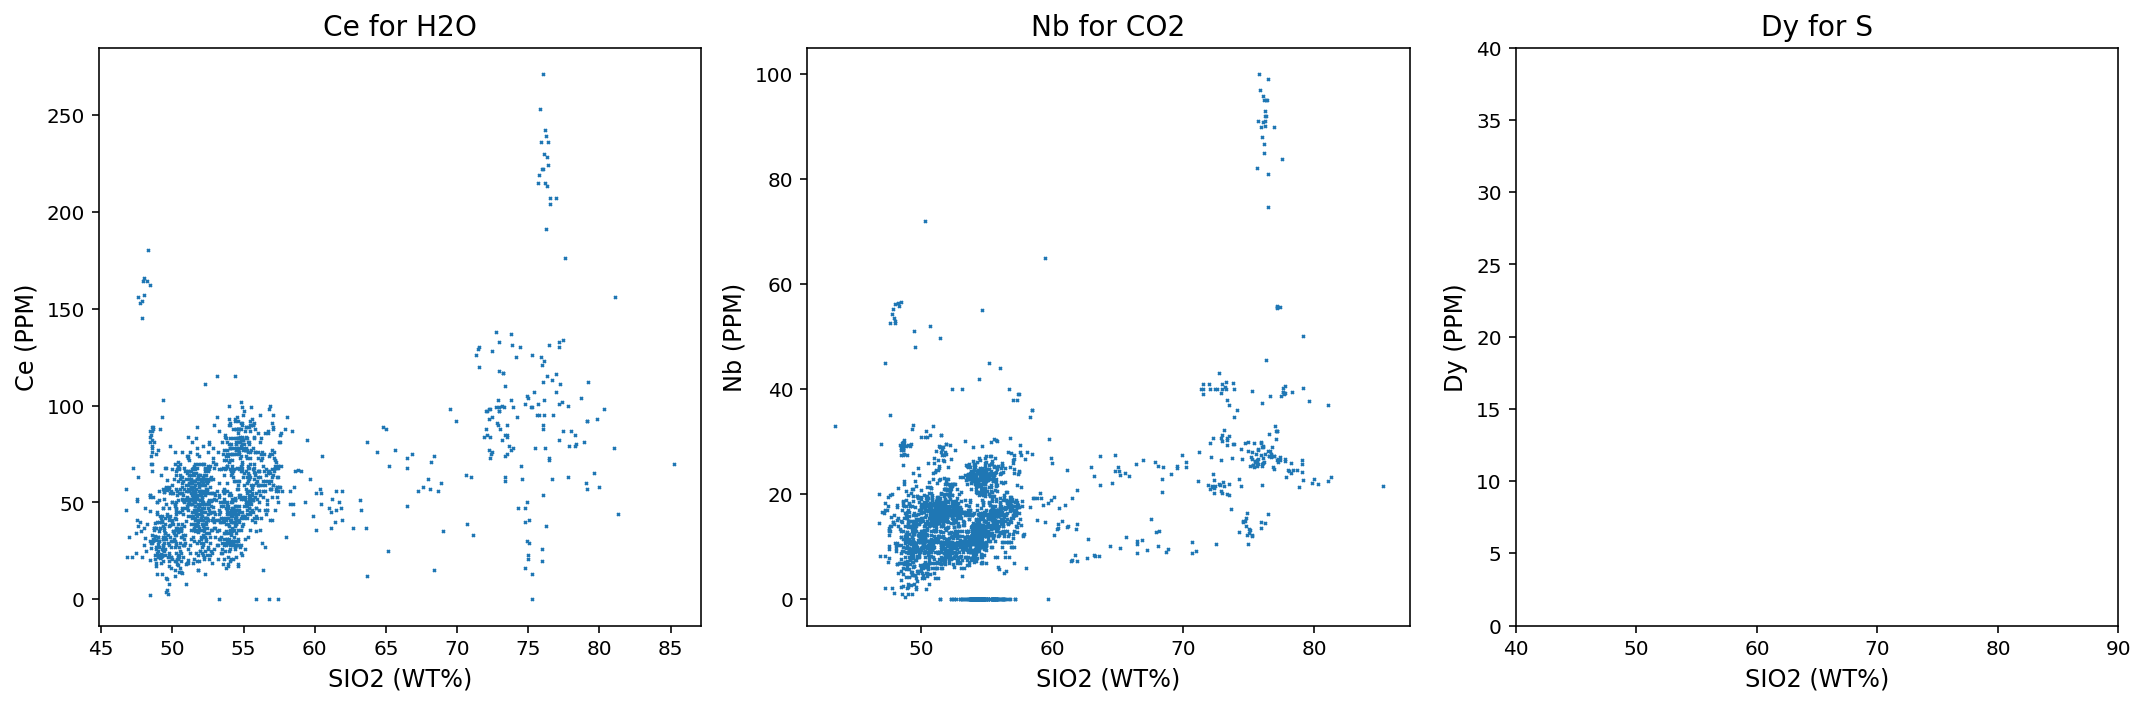

In [10]:
fig, ax= plt.subplots(ncols=3, figsize=(15,5), tight_layout = True)

gb_wholerock.plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', s=2, marker='x', vmin=0, ax=ax[0])
ax[0].set_title('Ce for H2O', fontsize = 14)
ax[0].set_xlabel('SIO2 (WT%)', fontsize = 12)
ax[0].set_ylabel('Ce (PPM)', fontsize = 12)
# ax[0].grid(which='minor', linestyle = 'dotted', color = 'k')
# ax[0].grid(which='major', linestyle = 'dotted', color = 'k')
# ax[0].set_xlim(,)
# ax[0].set_ylim(,)

gb_wholerock.plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', s=2, marker='x', vmin=0, ax=ax[1])
ax[1].set_title('Nb for CO2', fontsize = 14)
ax[1].set_xlabel('SIO2 (WT%)', fontsize = 12)
ax[1].set_ylabel('Nb (PPM)', fontsize = 12)
# ax[1].grid(which='minor', linestyle = 'dotted', color = 'k')
# ax[1].grid(which='major', linestyle = 'dotted', color = 'k')
# ax[1].set_xlim(,)
# ax[1].set_ylim(,)

gb_wholerock.plot.scatter(x='SIO2(WT%)NORM', y='DY(PPM)', s=2, marker='x', vmin=0, ax=ax[2])
ax[2].set_title('Dy for S', fontsize = 14)
ax[2].set_xlabel('SIO2 (WT%)', fontsize = 12)
ax[2].set_ylabel('Dy (PPM)', fontsize = 12)
# ax[2].grid(which='minor', linestyle = 'dotted', color = 'k')
# ax[2].grid(which='major', linestyle = 'dotted', color = 'k')
ax[2].set_xlim(40,90)
ax[2].set_ylim(0,40);